<a href="https://colab.research.google.com/github/srijan-singh/machine-learning/blob/main/Reinforcement/Epsilon_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Actions:
  def __init__(self,m):
    self.m=m
    self.mean=0
    self.N=0

  def choose(self):
    return np.random.randn() + self.m
  
  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [14]:
def run_experiment(m1, m2, m3, eps, N):

  actions = [Actions(m1), Actions(m2), Actions(m3)]

  data = np.empty(N)

  for i in range(N):
    # epsiolon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([a.mean for a in actions])
    
    x = actions[j].choose()
    actions[j].update(x)

    # for the plot
    data[i] = x  
  cumulative_average = np.cumsum(data) / (np.arange(N)+1)

  # plot
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m2)
  plt.xscale('log')
  plt.show()

  for a in actions:
    print(a.mean)
  return cumulative_average

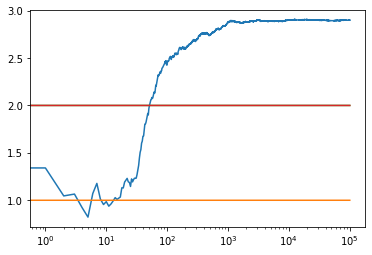

1.0197972872956813
1.9869446827302955
3.0011109954435833


In [15]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

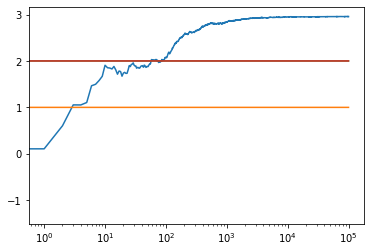

1.0137520199753456
2.0621830296760906
3.0070708340896


In [17]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

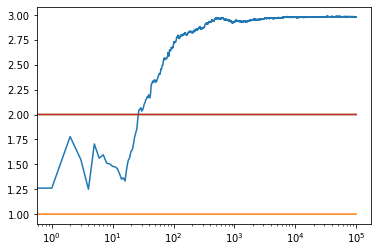

1.0150125181517018
2.0596662032461897
2.9919420603428066


In [18]:
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

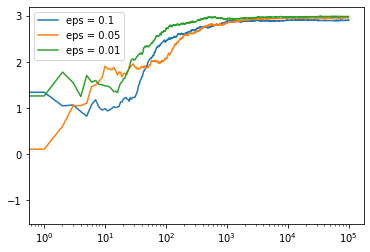

In [20]:
# log scale plot
plt.plot(c_1, label="eps = 0.1")
plt.plot(c_05, label="eps = 0.05")
plt.plot(c_01, label="eps = 0.01")
plt.legend()
plt.xscale('log')
plt.show()

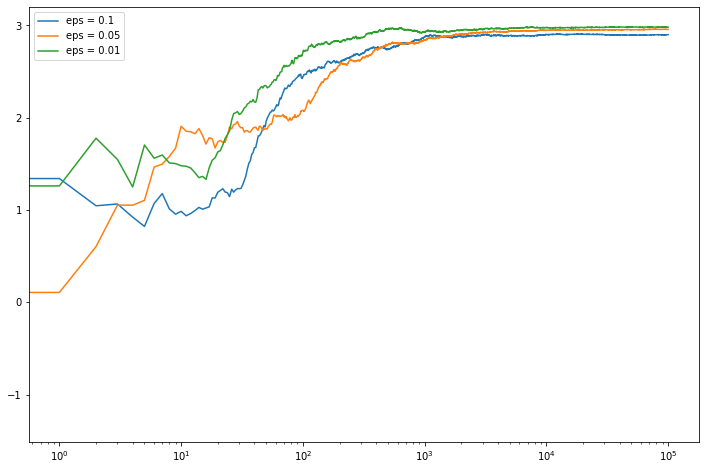

In [21]:
# linear plot
plt.figure(figsize=(12,8))
plt.plot(c_1, label="eps = 0.1")
plt.plot(c_05, label="eps = 0.05")
plt.plot(c_01, label="eps = 0.01")
plt.legend()
plt.xscale('log')
plt.show()